
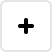
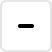
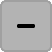
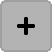
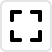
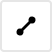
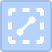

In [1]:
from pandas import DataFrame
import numpy as np
import math
from lets_plot import *

LetsPlot.setup_html()

In [2]:
# Load datasets
import pandas as pd

mpg_df = pd.read_csv ("https://jetbrains.bintray.com/lets-plot/mpg.csv")
iris_df = pd.read_csv('https://jetbrains.bintray.com/lets-plot/iris.csv')

### Crosshair examples

In [3]:
# geom_point
(ggplot(mpg_df, aes(x='displ', y='cty', fill='drv', size='hwy')) + ggtitle('geom_point')
     + scale_size(range=[5, 15], breaks=[15, 40])
     + ggsize(600, 350)
     + geom_point(shape=21, color='white',
              tooltips=layer_tooltips()
                          .anchor('top_right')
                          .min_width(180)
                          .format('cty', '.0f')
                          .format('hwy', '.0f')
                          .format('drv', '{}wd')
                          .line('@manufacturer @model')
                          .line('cty/hwy [mpg]|@cty/@hwy')
                          .line('@|@class')
                          .line('drive train|@drv')
                          .line('@|@year')) 
)

In [4]:
# geom_smooth
(ggplot(mpg_df, aes(x='displ', y='hwy')) + ggtitle('geom_smooth')
 + geom_point() 
 + geom_smooth(method='loess', size=1, 
               tooltips=layer_tooltips()
                            .line('min|^ymin')
                            .line('|^y')
                            .line('max|^ymax')
                            .anchor('top_right'))
)

In [5]:
# geom_area
(ggplot(iris_df) + ggtitle('geom_area')
 + geom_area(aes(x='sepal_length', fill='species'), 
             stat='density',
             color='white',
             tooltips=layer_tooltips()
                .anchor('top_right')
                .line('^fill')
                .line('length|^x')
                .line('density|^y'))
 + ggsize(650, 300) 
)

In [6]:
# geom_line
T = 1
N = 1000
t = np.linspace(0, T, N)
dt = T / N
# brownian motions
W1 = np.random.standard_normal(size=N)
Wt1 = np.cumsum(W1) * np.sqrt(dt)
W2 = np.random.standard_normal(size=N)
Wt2 = np.cumsum(W2) * np.sqrt(dt)
l_dat = {}
l_dat['W1'] = Wt1
l_dat['W2'] = Wt2
l_dat['t'] = t
# transform data via melt function
# to produce two trajectories
l_dat = pd.DataFrame(l_dat)
l_dat = pd.melt(l_dat, id_vars=['t'], value_vars=['W1', 'W2'])

ggplot(l_dat, aes(x='t', y='value', group='variable')) + ggtitle('geom_line')\
+ geom_line(aes(color='variable'), size=1, alpha=0.7, tooltips=layer_tooltips().anchor('top_left'))


In [7]:
# geom_freqpoly
ggplot(l_dat, aes(x='value')) + ggtitle('geom_freqpoly') \
+ geom_freqpoly(size=2, tooltips=layer_tooltips().anchor('top_right'))

In [8]:
# geom_path
path_dat={}
path_dat['x']=[1e-3,2e-3,3e-3,4e-3,5e-3,5e-3,4e-3,3e-3,2e-3,1e-3]
path_dat['y']=[1e-3,2e-3,3e-3,4e-3,5e-3,1e-3,2e-3,3e-3,4e-3,5e-3]
path_dat['g']=[1,1,1,1,1,2,2,2,2,2]

ggplot(path_dat, aes(x='x',y='y',group='g')) + ggtitle('geom_path')\
    + geom_path(aes(color='g'), stat='density2d',bins=3, tooltips=layer_tooltips().anchor('middle_center'))\
        + scale_color_gradient(low='dark_green',high='red')

In [9]:
# geom_contour
X_max = 50
Y_max = 50
def z_fun(x, y):
    z = math.sin(x * 3 * math.pi / X_max)
    z += math.sin(y * 3 * math.pi / Y_max)
    z += x * 3 / X_max
    z += y * 5 / Y_max
    return z

x = []
y = []
z = []
for row in range(0, Y_max - 1):
    for col in range(0, X_max - 1):
        x.append(col)
        y.append(row)
        z.append(z_fun(col, row))

c_dat = dict(x=x, y=y, z=z)

(ggplot(c_dat, aes('x', 'y')) + ggtitle('geom_contour')
 + scale_color_gradient('green', 'red')
 + geom_contour(aes(z='z', color='..level..'), bins=30, tooltips=layer_tooltips().anchor('top_right'))
)

In [10]:
# geom_density
np.random.seed(43)
dat={}
dat['x'] = np.append(np.random.normal(0,1,1000), np.random.normal(3,1,500))
dat['y'] = np.append(np.random.normal(0,1,1000), np.random.normal(3,1,500))


ggplot(dat,aes('x')) + ggtitle('geom_density') + geom_density(tooltips=layer_tooltips().anchor('top_right'))

In [11]:
# geom_density2d
ggplot(dat, aes('x', 'y')) + ggtitle('geom_density2d')\
  + geom_density2d(aes(color='..level..'), tooltips=layer_tooltips().anchor('top_right'))

In [12]:
# geom_tile
d={
    'x': [1,2,3,4,5],
    'z': [-1,-0.5,0,0.5,1]
}
ggplot(d, aes('x',  fill='z')) + ggtitle('geom_tile')\
 + geom_tile(tooltips=layer_tooltips().anchor('top_center')) 

In [13]:
# geom_ribbon
id = ["A", "A", "A", "B", "B", "B"]
x = [1, 2, 4, 1, 3, 4]
ymin = [-1, 0, 0, 3, 3, 4]
ymax = [0, 1, 1, 4, 5, 5]
r_dat = {}
r_dat = dict(id=id, x=x, ymin=ymin, ymax=ymax)

ggplot(r_dat) + ggtitle('geom_ribbon') \
  + geom_ribbon(aes(x='x', ymin='ymin', ymax='ymax', group='id', fill='id'), color='black', alpha=0.5,
                tooltips=layer_tooltips().anchor('top_right'))

In [14]:
# geom_ribbon
ggplot(r_dat) + ggtitle('geom_ribbon') \
  + geom_ribbon(aes(x='x', ymin='ymin', ymax='ymax', group='id', fill='id'), color='black', alpha=0.5)

In [15]:
# polygon with points
d1 = {
    'x': [0.75, 1.75, 0.75, 1.75, 0.75, 1.75],
    'y': [2.75, 2.75, 1.75, 1.75, 0.75, 0.35], 
    'group': [1, 1, 2, 2, 3, 3],
}

id = ["1.1", "2.1", "1.2", "2.2", "1.3", "2.3"]
val = [3, 3.1, 3.1, 3.2, 3.15, 3.5]
x = [2, 1, 1.1, 2.2, 1, 0, 0.3, 1.1, 2.2, 1.1, 1.2, 2.5, 1.1, 0.3, 0.5, 1.2, 2.5, 1.2, 1.3, 2.7, 1.2, 0.5, 0.6, 1.3]
y = [-0.5, 0, 1, 0.5, 0, 0.5, 1.5, 1, 0.5, 1, 2.1, 1.7, 1, 1.5, 2.2, 2.1, 1.7, 2.1, 3.2, 2.8, 2.1, 2.2, 3.3, 3.2]
id4 = [v for v in id for _ in range(4)]
val4 = [v for v in val for _ in range(4)]
d2 = dict(id=id4, val=val4, x=x, y=y)

ggplot(d2, aes(x, y)) + ggtitle('polygon with points') \
 + geom_polygon(aes(fill='val', group='id'), tooltips=layer_tooltips().anchor('top_right'))\
 + geom_point(data=d1, mapping=aes(x='x', y='y', color='group'), tooltips=layer_tooltips().anchor('top_right'))


### No crosshair

In [16]:
# geom_bin2d
ggplot(dat, aes('x', 'y')) + ggtitle('geom_bin2d')\
 + geom_bin2d(tooltips=layer_tooltips().anchor('top_right')) + ggtitle('geom_bin2d')

In [17]:
# geom_contourf
(ggplot(c_dat, aes('x', 'y')) + ggtitle('geom_contourf')
 + scale_fill_gradient('green', 'red')
 + geom_contourf(aes(z='z', fill='..level..',alpha='..level..'),
                                 tooltips=layer_tooltips().anchor('top_right'))
)

In [18]:
# geom_density2df
ggplot(dat, aes('x', 'y')) + ggtitle('geom_density2df')\
  + geom_density2df(aes(fill = '..level..'), tooltips=layer_tooltips().anchor('top_right'))

In [19]:
# geom_boxplot
(ggplot(mpg_df, aes('class', 'hwy')) 
  + ggtitle('geom_boxplot')
  + geom_boxplot(tooltips=layer_tooltips()
                  .anchor('top_center')
                  .format('^Y', '.0f')
                  .format('^middle', '.2f')
                  .line('@|^middle')
                  .line('lower/upper|^lower/^upper')
                  .line('min/max|^ymin/^ymax'))
       )

In [20]:
# geom_histogram + geom_vline
np.random.seed(123)
data = DataFrame(dict(
    cond=np.repeat(['A','B'], 200),
    rating=np.concatenate((np.random.normal(0, 1, 200), np.random.normal(.8, 1, 200)))
))
cdat = data.groupby(['cond'], as_index=False).mean()


(ggplot(data, aes(x='rating', fill='cond'))  + ggtitle('geom_histogram + geom_vline') 
 + geom_histogram(binwidth=.5, alpha=.8, tooltips=layer_tooltips().anchor('top_right'))
 + geom_vline(data=cdat, 
              mapping=aes(xintercept='rating'), 
              linetype="longdash", size=1, color="red",
              tooltips=layer_tooltips().anchor('top_left'))
)

In [21]:
tdata = dict(
    supp = ['OJ', 'OJ', 'OJ', 'VC', 'VC', 'VC'],
    dose = [0.5, 1.0, 2.0, 0.5, 1.0, 2.0],
    length = [13.23, 22.70, 26.06, 7.98, 16.77, 26.14],
    len_min = [11.83, 21.2, 24.50, 4.24, 15.26, 23.35],
    len_max = [15.63, 24.9, 27.11, 10.72, 19.28, 28.93]
)

# geom_errorbar
(ggplot(tdata, aes(x='dose', color='supp')) 
  + ggtitle('geom_errorbar')
  + geom_errorbar(aes(ymin='len_min', ymax='len_max'), width=.1,
                  tooltips=layer_tooltips().line('len_min|^ymin').line('len_max|^ymax').anchor('top_left')) 
  + geom_line(aes(y='length')) 
  + geom_point(aes(y='length'))
)

In [22]:
# geom_crossbar
(ggplot(tdata, aes(x='dose', color='supp'))
  + ggtitle('geom_crossbar')
  + geom_crossbar(aes(ymin='len_min', ymax='len_max', middle='length', color='supp'), fatten=5,
                  tooltips=layer_tooltips()
                     .line('len_min|^ymin')
                     .line('|^middle')
                     .line('len_max|^ymax')
                     .anchor('middle_right'))
)

In [23]:
#geom_bar
(ggplot(tdata, aes(x='dose', color='supp')) 
 + ggtitle('geom_bar')
 + geom_bar(aes(y='length', fill='supp'), stat='identity', position='dodge', color='black',
          tooltips=layer_tooltips().anchor('top_center'))
)

In [24]:
# geom_linerange
(ggplot(tdata, aes(x='dose', color='supp'))
  + ggtitle('geom_linerange')
  + geom_linerange(aes(ymin='len_min', ymax='len_max', color='supp'), position=position_dodge(0.1), size=3,
                   tooltips=layer_tooltips()
                     .line('len_min|^ymin')
                     .line('len_max|^ymax')
                     .anchor('top_left'))
  + geom_line(aes(y='length'), position=position_dodge(0.1))
)

In [25]:
# geom_pointrange
(ggplot(tdata, aes(x='dose', color='supp'))
  + ggtitle('geom_pointrange')
  + geom_pointrange(aes(y='length', ymin='len_min', ymax='len_max', color='supp'), position=position_dodge(0.1), size=3, shape=23, fatten=1,
                   tooltips=layer_tooltips()
                     .line('len_min|^ymin')
                     .line('|^y')
                     .line('len_max|^ymax')
                     .anchor('top_left'))
  + geom_line(aes(y='length'), position=position_dodge(0.1))
)